# Generate PhenomTPHM

This notebook gives example usage for the function `ls_tdmodes_to_gwylm` that calls the lalsimulation `SimInspiralGetTDModes` function and generates an approximate `nrutils` `gwylm` object from it.

In [2]:
from numpy import array, pi, cos, sin

import matplotlib.pyplot as plt
%matplotlib inline

from nrutils.core.nrsc import ls_tdmodes_to_gwylm

(positive)>> Applying custom matplotlib settings.


In [3]:
# set spin data

chi1 = 0.3
theta1 = 30.0 * pi / 180.0
phi1 = 0.0

chi2 = 0.5
theta2 = 60.0 * pi / 180.0
phi2 = 20.0 * pi / 180.0

X1 = chi1 * array([sin(theta1)*cos(phi1),sin(theta1)*sin(phi1),cos(theta1)])
X2 = chi2 * array([sin(theta2)*cos(phi2),sin(theta2)*sin(phi2),cos(theta2)])

In [4]:
?ls_tdmodes_to_gwylm

Signature:
ls_tdmodes_to_gwylm(
    apx='IMRPhenomTPHM',
    eta=None,
    chi1=None,
    chi2=None,
    fmin_hz=30.0,
    distance=0.0,
    lmax=None,
    dt=0.5,
    pad=2000,
    clean=True,
    verbose=False,
)
Docstring: <no docstring>
File:      ~/git/nrutils_dev/nrutils/core/nrsc.py
Type:      function


In [6]:
%%capture
y = ls_tdmodes_to_gwylm(eta=0.1, chi1=X1, chi2=X2, fmin_hz=15.0, lmax=4, dt=1.0, verbose=False)

We can now use built-in `nrutils` functionality to manipulate the model data.

In [7]:
%%capture
yj = y.__calc_j_of_t_frame__()

In [8]:
%%capture
yc_td = yj.__calc_coprecessing_frame__(kind='strain',transform_domain='td',select_lm_list=None)

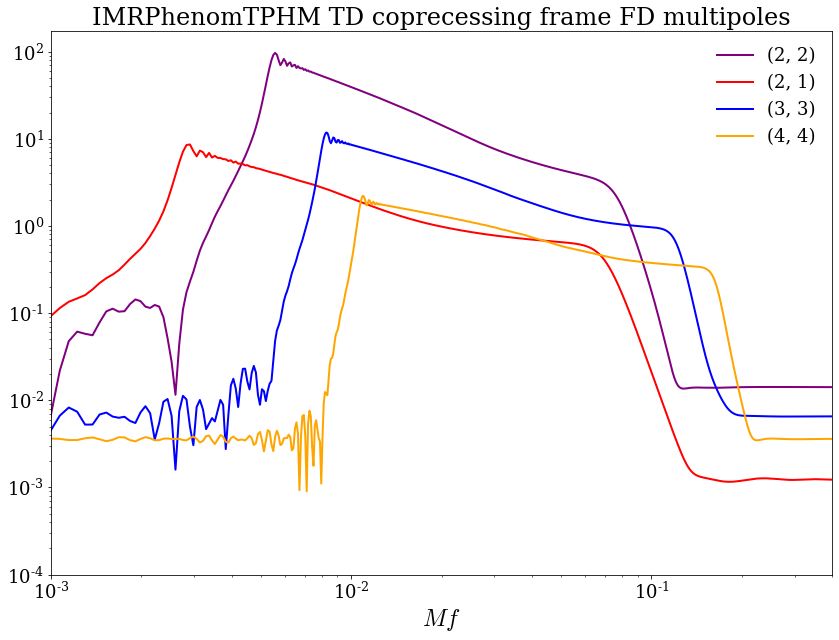

In [14]:
plt.figure(figsize=(14,10))
for lm,c in zip([(2,2),(2,1),(3,3),(4,4)],['purple','r','b','orange']):
    l,m = lm
    plt.loglog(yc_td.f,yc_td[l,-m]['strain'].fd_amp,lw=2,label=lm,c=c)  # TPHM convention sets positive frequency content to -m multipoles
    
plt.legend()
plt.xlim(1e-3,4e-1)
plt.ylim(1e-4,)
plt.title('IMRPhenomTPHM TD coprecessing frame FD multipoles')
plt.xlabel(r'$Mf$')
plt.show()